# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 7 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.loc'] = 'best'

## Esercizio 07.1: <span style="color:brown"> Autocorrelazione e grandezza dei blocchi </span>
Utilizzando l'algoritmo di Metropolis per eseguire il campionamento con un totale di $M=5\cdot10^5$ steps, è possibile calcolare le funzioni di autocorrelazione $\chi\,$(*time-displaced autocorrelation*) per le grandezze di interesse (in questo caso la temperatura $T$ e la pressione $P$), per ciascuna delle tre fasi (solido, liquido, gas) che si vogliono considerare.\
Di seguito sono riportati i grafici delle funzioni di autocorrelazione.

**Osservazione:** Prima di eseguire le misure di qualsiasi grandezza bisogna far equilibrare il sistema; per questo motivo si sono studiati i valori istantanei di pressione $P$ ed energia potenziale $U/N$ e si è notato che si raggiunge l'equilibrio già dopo  poche centinaia di steps del Metropolis. Per questo motivo ognuna delle simulazioni è stata fatta equilibrare con $500$ steps prima di prendere le misure. 

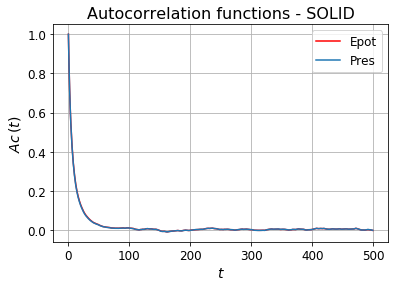

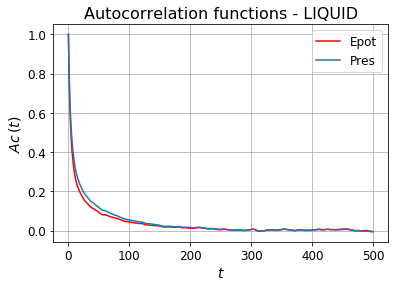

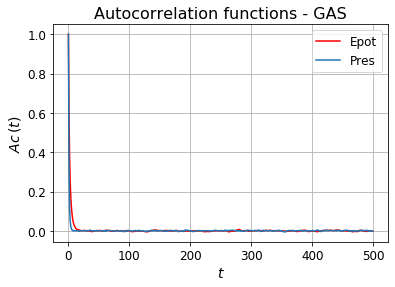

In [2]:
#load data and plot time-displaced autocorrelations
ep_liquid = np.loadtxt('MonteCarlo_NVT/ac_epot_liquid.dat', dtype=float)
p_liquid = np.loadtxt('MonteCarlo_NVT/ac_pres_liquid.dat', dtype=float)
ep_solid = np.loadtxt('MonteCarlo_NVT/ac_epot_solid.dat', dtype=float)
p_solid = np.loadtxt('MonteCarlo_NVT/ac_pres_solid.dat', dtype=float)
ep_gas = np.loadtxt('MonteCarlo_NVT/ac_epot_gas.dat', dtype=float)
p_gas = np.loadtxt('MonteCarlo_NVT/ac_pres_gas.dat', dtype=float)

t = np.array([i for i in range(len(ep_liquid))])
v_end = 500 #last element for plots

#plot the first part of functions
#solid
plt.plot(t[:v_end], ep_solid[:v_end], color='red',label='Epot')
plt.plot(t[:v_end], p_solid[:v_end], label='Pres')
plt.title(r'Autocorrelation functions - SOLID')
plt.xlabel(r'$t$')
plt.ylabel(r'$Ac\,(t)$')
plt.legend()
plt.grid(True)
plt.show()

#liquid
plt.plot(t[:v_end], ep_liquid[:v_end], color='red',label='Epot')
plt.plot(t[:v_end], p_liquid[:v_end], label='Pres')
plt.title(r'Autocorrelation functions - LIQUID')
plt.xlabel(r'$t$')
plt.ylabel(r'$Ac\,(t)$')
plt.legend()
plt.grid(True)
plt.show()

#gas
plt.plot(t[:v_end], ep_gas[:v_end], color='red',label='Epot')
plt.plot(t[:v_end], p_gas[:v_end], label='Pres')
plt.title(r'Autocorrelation functions - GAS')
plt.xlabel(r'$t$')
plt.ylabel(r'$Ac\,(t)$')
plt.legend()
plt.grid(True)
plt.show()

Si nota che la fase liquida è quella in cui servono più step per rendere trascurabili le correlazioni, mentre nel gas sono trascurabili già dopo pochi steps.\
Per $t>200$ le funzioni sono prossime a 0, per entrambe le osservabili e per tuttel le fasi considerate; questo significa che dopo 200 step Monte Carlo i passi diventano scorrelati e quindi i blocchi della simulazione dovranno essere almeno 2/3 volte più grandi di tale valore.

A questo punto, utilizzando le stesse quantità istantanee del caso precedente, è possibile fare uno studio delle incertezze ottenute con il *data blocking*, al crescere del numero di punti per ogni blocco. In questo modo è possibile stimare la grandezza minima dei blocchi che si dovrà utilizzare nel seguito.\
Si sceglie $L = M/N$ nell'intervallo $[10, 5000]$, utilizzando solo i valori che che dividono $M$ (per utilizzare sempre tutti i dati) e si calcola l'incertezza statistica.

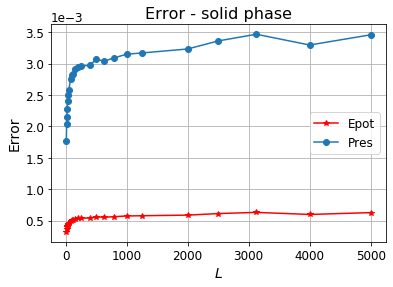

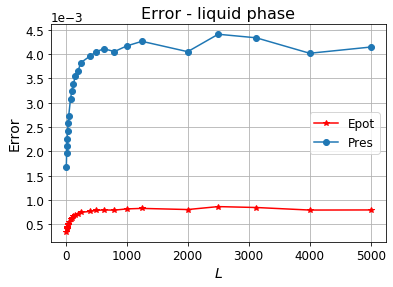

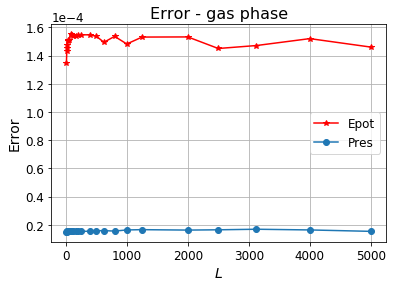

In [3]:
#load all files
error_ep_solid = np.loadtxt('MonteCarlo_NVT/error_epot_solid.dat', dtype=float)
error_p_solid = np.loadtxt('MonteCarlo_NVT/error_pres_solid.dat', dtype=float)
error_ep_liquid = np.loadtxt('MonteCarlo_NVT/error_epot_liquid.dat', dtype=float)
error_p_liquid = np.loadtxt('MonteCarlo_NVT/error_pres_liquid.dat', dtype=float)
error_ep_gas = np.loadtxt('MonteCarlo_NVT/error_epot_gas.dat', dtype=float)
error_p_gas = np.loadtxt('MonteCarlo_NVT/error_pres_gas.dat', dtype=float)
L_steps = np.loadtxt('MonteCarlo_NVT/L.dat', dtype=int) #values of L

#make plots
#solid
plt.plot(L_steps, error_ep_solid, color='red', marker='*', label='Epot')
plt.plot(L_steps, error_p_solid, marker='o', label='Pres')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.title(f'Error - solid phase')
plt.xlabel(f'$L$')
plt.ylabel(f'Error')
plt.legend()
plt.grid(True)
plt.show()

#liquid
plt.plot(L_steps, error_ep_liquid, color='red', marker='*', label='Epot')
plt.plot(L_steps, error_p_liquid, marker='o', label='Pres')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.title(f'Error - liquid phase')
plt.xlabel(f'$L$')
plt.ylabel(f'Error')
plt.legend()
plt.grid(True)
plt.show()

#gas
plt.plot(L_steps, error_ep_gas, color='red', marker='*', label='Epot')
plt.plot(L_steps, error_p_gas, marker='o', label='Pres')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.title(f'Error - gas phase')
plt.xlabel(f'$L$')
plt.ylabel(f'Error')
plt.legend()
plt.grid(True)
plt.show()

Si osserva che per tutti i casi considerati si ha un aumento dell'incertezza se $L$ è troppo piccolo, mentre per valori superiori a $1000$ l'errore tende a stabilizzarsi.\
Nel caso del gas i risultati di questa stima sono meno evidenti; infatti le incertezze sono un ordine di grandezza più piccole e questo rende i risultati soggetti ad oscillazioni significative (come nel caso della pressione).

Valutando i risultati delle autocorrelazioni e delle incertezze sui blocchi, si può stimare che la grandezza minima del blocco deve essere di $1000$ steps Monte Carlo. Nel seguito si è deciso di utilizzare blocchi con $L=5000$.

## Esercizio 07.4: <span style="color:brown"> Simulazioni MC dell'Argon di LJ nell'insieme canonico </span>

Si riportano i risultati delle simulazioni per l'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), trattato come un fluido di Lennard-Jones.\
Per inizializzare la simulazioni sono state utilizzate le seguenti quantità, scritte in unità di LJ:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Ogni simulazione è stata divisa in $N=50$ blocchi, con $L=5000$ steps dell'algoritmo di Metropolis per ogni blocco. I valori medi e le incertezze sono calcolate utilizzando il data blocking.

In [4]:
#conversion from LJ to SI units
Kb = 1.380649 * 10**(-23)
amu = 1.66054 * 10**(-27)

eps = 120.*Kb           #J
sigma = 0.34 * 10**(-9) #m
m = 34.948*amu          #kg

#box sizes
box_solid = (108/1.1)**(1./3.)
box_liquid = (108/0.8)**(1./3.)
box_gas = (108/0.05)**(1./3.)

#steps per block
L = 5000

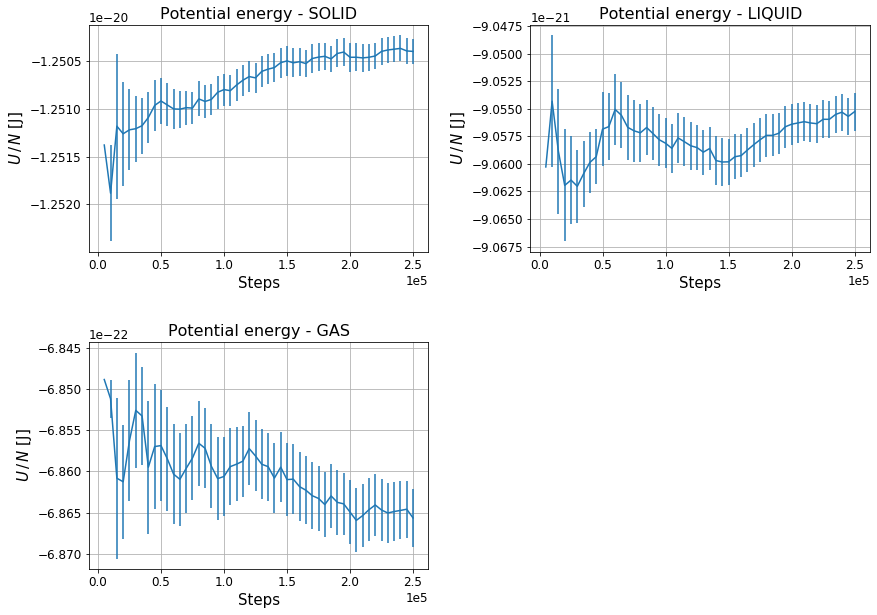

In [5]:
#load data
x_Us, ave_Us, err_Us = np.loadtxt('MonteCarlo_NVT/output.epot.solid', dtype=float, unpack='true', usecols=(0,2,3))
x_Ul, ave_Ul, err_Ul = np.loadtxt('MonteCarlo_NVT/output.epot.liquid', dtype=float, unpack='true', usecols=(0,2,3))
x_Ug, ave_Ug, err_Ug = np.loadtxt('MonteCarlo_NVT/output.epot.gas', dtype=float, unpack='true', usecols=(0,2,3))

x_Us *= L #Total steps
x_Ul *= L
x_Ug *= L

x_U = [x_Us, x_Ul, x_Ug]
ave_U = np.array([ave_Us, ave_Ul, ave_Ug])*eps
err_U = np.array([err_Us, err_Ul, err_Ug])*eps
labels = ["Potential energy - SOLID", "Potential energy - LIQUID", "Potential energy - GAS"]

#make figures
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
axx = [ax1, ax2, ax3]

for ax, x, ave, err, label in zip(axx, x_U, ave_U, err_U, labels):
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    ax.errorbar(x, ave, yerr=err)
    ax.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(r'Steps', size=15)
    ax.set_ylabel(r'$U\,/\,N$ [J]', size=15)
    ax.grid(True)

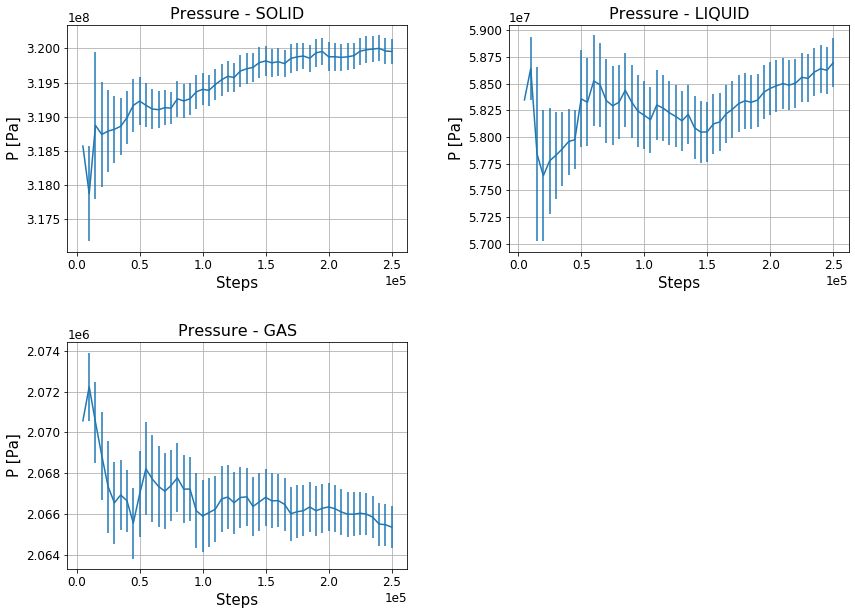

In [7]:
#load data
x_Ps, ave_Ps, err_Ps = np.loadtxt('MonteCarlo_NVT/output.pres.solid', dtype=float, unpack='true', usecols=(0,2,3))
x_Pl, ave_Pl, err_Pl = np.loadtxt('MonteCarlo_NVT/output.pres.liquid', dtype=float, unpack='true', usecols=(0,2,3))
x_Pg, ave_Pg, err_Pg = np.loadtxt('MonteCarlo_NVT/output.pres.gas', dtype=float, unpack='true', usecols=(0,2,3))

x_Ps *= L
x_Pl *= L
x_Pg *= L

#useful for figures
x_P = [x_Ps, x_Pl, x_Pg]
ave_P = np.array([ave_Ps, ave_Pl, ave_Pg])*eps/(sigma**3)
err_P = np.array([err_Ps, err_Pl, err_Pg])*eps/(sigma**3)
labels = ["Pressure - SOLID", "Pressure - LIQUID", "Pressure - GAS"]

#make figures
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
axx = [ax1, ax2, ax3]

for ax, x, ave, err, label in zip(axx, x_P, ave_P, err_P, labels):
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    ax.errorbar(x, ave, yerr=err)
    ax.ticklabel_format(axis='both', style='sci',scilimits=(0,0))
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(r'Steps', size=15)
    ax.set_ylabel(r'P [Pa]', size=15)
    ax.grid(True)

### Funzione di distribuzione radiale (a coppie)

Si riportano i grafici per la funzione di distribuzione a coppie $g(r)$, ottenute nell'insieme canonico, e le si confronta con le rispettive funzioni calcolate nell'insieme microcanonico con la simulazione di *dinamica molecolare*.

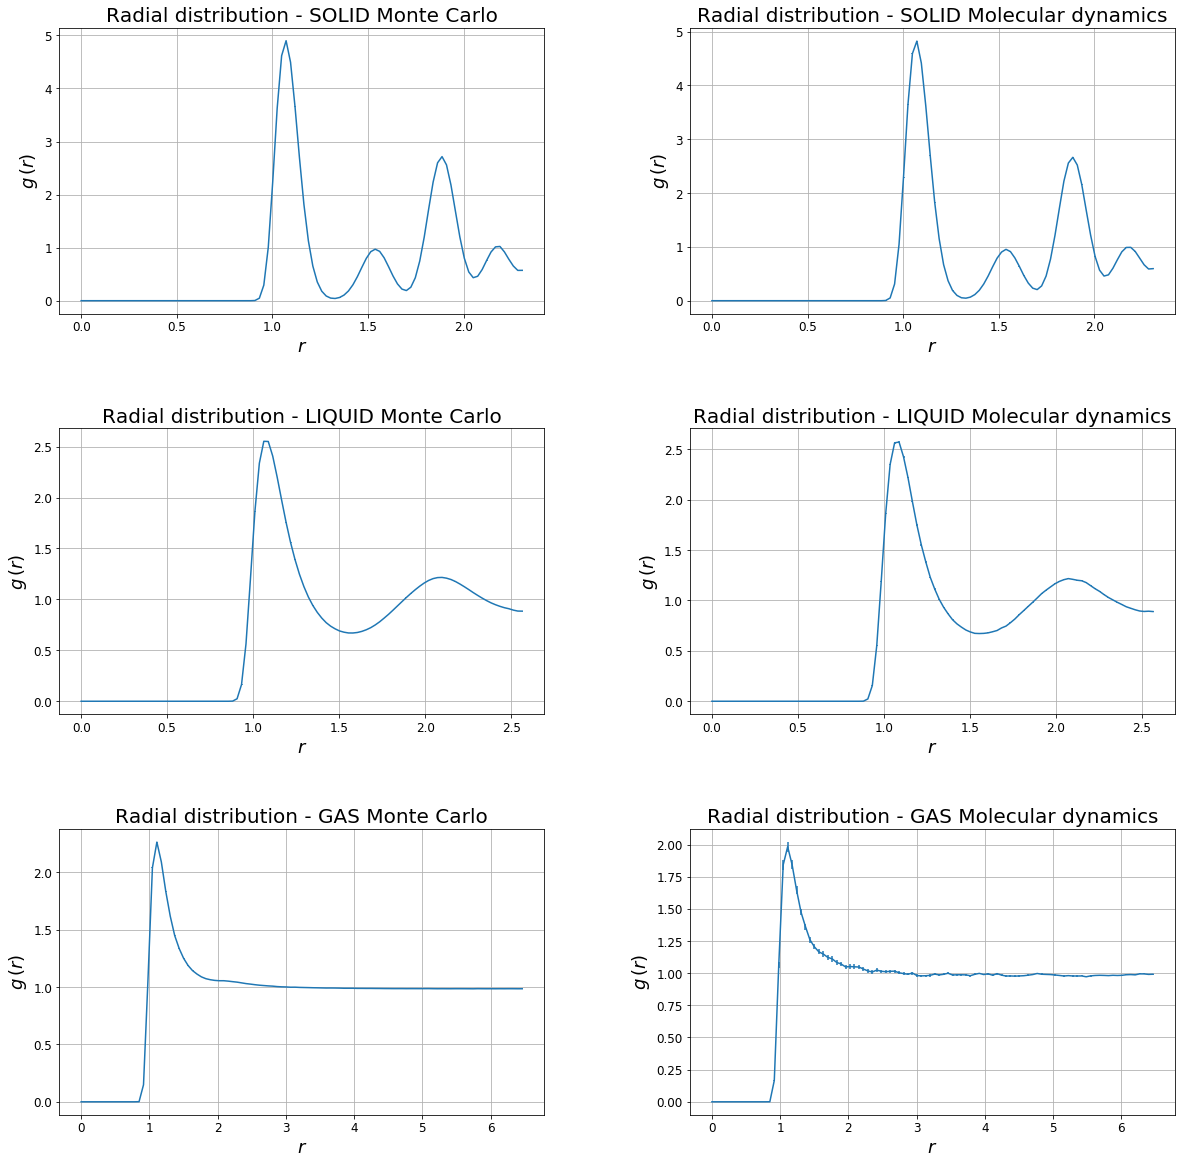

In [8]:
#load radial distribution functions (Montecarlo and molecular dynamics)
gofr_MC_s, err_gofr_MC_s = np.loadtxt('MonteCarlo_NVT/output.gave.solid', dtype=float, unpack='true', usecols=(1,2))
gofr_MC_l, err_gofr_MC_l = np.loadtxt('MonteCarlo_NVT/output.gave.liquid', dtype=float, unpack='true', usecols=(1,2))
gofr_MC_g, err_gofr_MC_g = np.loadtxt('MonteCarlo_NVT/output.gave.gas', dtype=float, unpack='true', usecols=(1,2))
gofr_MD_s, err_gofr_MD_s = np.loadtxt('MolDyn/ave_gofr.solid', dtype=float, unpack='true', usecols=(1,2))
gofr_MD_l, err_gofr_MD_l = np.loadtxt('MolDyn/ave_gofr.liquid', dtype=float, unpack='true', usecols=(1,2))
gofr_MD_g, err_gofr_MD_g = np.loadtxt('MolDyn/ave_gofr.gas', dtype=float, unpack='true', usecols=(1,2))

r_s = np.linspace(0., box_solid/2., len(gofr_MC_s))
r_l = np.linspace(0., box_liquid/2., len(gofr_MC_s))
r_g = np.linspace(0., box_gas/2., len(gofr_MC_s))

#make plots
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
ax6 = plt.subplot(3,2,6)

#solid
ave_gofr = np.array([gofr_MC_s, gofr_MD_s])
err_gofr = np.array([err_gofr_MC_s, err_gofr_MD_s])
labels = ["Radial distribution - SOLID Monte Carlo", "Radial distribution - SOLID Molecular dynamics"]
axx = [ax1, ax2]

for ax, ave, err, label in zip(axx, ave_gofr, err_gofr, labels):
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    ax.errorbar(r_s, ave, yerr=err)
    ax.set_title(label, fontsize=20)
    ax.set_xlabel(r'$r$', size=18)
    ax.set_ylabel(r'$g\,(r)$', size=18)
    ax.grid(True)

#liquid
ave_gofr = np.array([gofr_MC_l, gofr_MD_l])
err_gofr = np.array([err_gofr_MC_l, err_gofr_MD_l])
labels = ["Radial distribution - LIQUID Monte Carlo", "Radial distribution - LIQUID Molecular dynamics"]
axx = [ax3, ax4]

for ax, ave, err, label in zip(axx, ave_gofr, err_gofr, labels):
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    ax.errorbar(r_l, ave, yerr=err)
    ax.set_title(label, fontsize=20)
    ax.set_xlabel(r'$r$', size=18)
    ax.set_ylabel(r'$g\,(r)$', size=18)
    ax.grid(True)

#gas
ave_gofr = np.array([gofr_MC_g, gofr_MD_g])
err_gofr = np.array([err_gofr_MC_g, err_gofr_MD_g])
labels = ["Radial distribution - GAS Monte Carlo", "Radial distribution - GAS Molecular dynamics"]
axx = [ax5, ax6]

for ax, ave, err, label in zip(axx, ave_gofr, err_gofr, labels):
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    ax.errorbar(r_g, ave, yerr=err)
    ax.set_title(label, fontsize=20)
    ax.set_xlabel(r'$r$', size=18)
    ax.set_ylabel(r'$g\,(r)$', size=18)
    ax.grid(True)

Dai grafici precedenti si osserva come queste funzioni siano uguali per entrambi i sistemi (canonico e microcanonico). Le distribuzioni radiali per le simulazioni di dinamica molecolare sono meno lisce perchè sono state campionate con meno punti (si nota soprattutto per la fase gassosa).